In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import chi2_contingency

os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray

# import pandas as pd
import modin.pandas as pd
import ray
ray.init(ignore_reinit_error=True)

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import *

2021-11-18 09:19:15,380	INFO worker.py:832 -- Calling ray.init() again after it has already been called.


In [2]:
%run ./module_P2_utils.ipynb

In [3]:
df = pd.read_csv("./tmp/df_02_quanti.csv")

# ANALYSIS

## Qualitative Values

With a pre-filtered dataset.

Let's look at the qualitative values, which ones are of interest

Reminder: from the quantitative analysis, we saw that following features are categorial
* nova_group
* ingredients_from_palm_oil_n
* ingredients_that_may_be_from_palm_oil_n
* additives_n (non continuous)
* nutriscore_score (non continuous)



### dispertion of values


## Outliers analysis

### Outliers for Qualitative Values

In [3]:
qualis = df.select_dtypes(['object', 'category']).columns

What is the ration of unique values for each feature ?

In [5]:
for col in df[qualis]:
    print(f'{col} {(df[col].unique().size / df[col].size):.000%}')

code 100%
creator 1%
created_datetime 87%
last_modified_datetime 78%
product_name 62%
brands 9%
brands_tags 7%
categories 6%
categories_tags 4%
categories_en 4%
countries 1%
countries_tags 0%
countries_en 0%
ingredients_text 31%
nutriscore_grade 0%
pnns_groups_1 0%
pnns_groups_2 0%
states 0%
states_tags 0%
states_en 0%
main_category 2%
main_category_en 2%
code 100%
creator 1%
created_datetime 87%
last_modified_datetime 78%
product_name 62%
brands 9%
brands_tags 7%
categories 6%
categories_tags 4%
categories_en 4%
countries 1%
countries_tags 0%
countries_en 0%
ingredients_text 31%
nutriscore_grade 0%
pnns_groups_1 0%
pnns_groups_2 0%
states 0%
states_tags 0%
states_en 0%
main_category 2%
main_category_en 2%


Let's see the modalities

In [7]:
for col in df[qualis]:
    print(f'{col:<40} {df[col].mode()}')

code                                     0         9542031695
1              96485
2                 97
3              97604
4         9800120499
           ...      
511    7340011495437
512    7798049540559
513    8008082903405
514    8033520537208
515    8437006177665
Name: code, Length: 516, dtype: object
creator                                  0    kiliweb
Name: creator, dtype: object
created_datetime                         0    2020-04-23 17:22:07+00:00
Name: created_datetime, dtype: object
last_modified_datetime                   0    2021-09-02 17:25:05+00:00
Name: last_modified_datetime, dtype: object
product_name                             0    Aceite de oliva virgen extra
Name: product_name, dtype: object
brands                                   0    Carrefour
Name: brands, dtype: object
brands_tags                              0    carrefour
Name: brands_tags, dtype: object
categories                               0    Snacks
Name: categories, dtype: object
categories_ta

We exclude some of the features of the further analysis, since they are not relevant

In [4]:
qualis = qualis.drop(labels=['code', 'creator'])

NameError: name 'qualis' is not defined

## Qualitative Features

<AxesSubplot:>

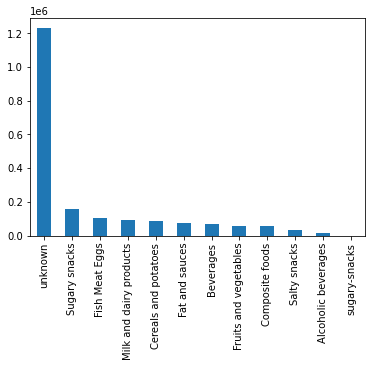

In [8]:
df['pnns_groups_1'].value_counts().plot(kind='bar')

In [12]:
# df.groupby('brands').head()

KeyboardInterrupt: 

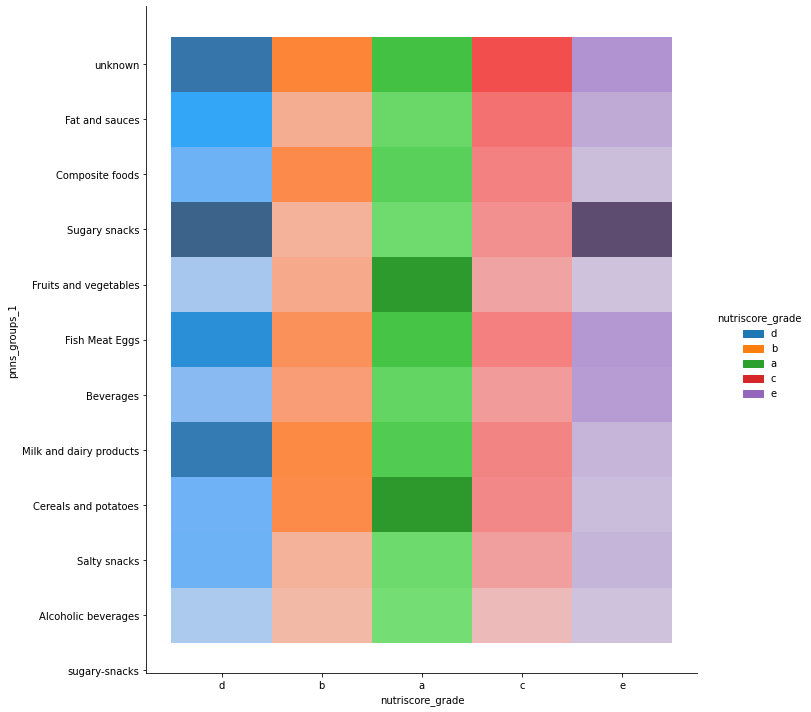

In [13]:
sns.displot(df, y='pnns_groups_1', x='nutriscore_grade', height=10, cmap='viridis', hue='nutriscore_grade')

We can see that for having a healthy meals (cat a), one would prefer to eat fruits, vegetables, cereals and potatoes.

At the opposite, having sugary snack is the worste (cat e) meal.


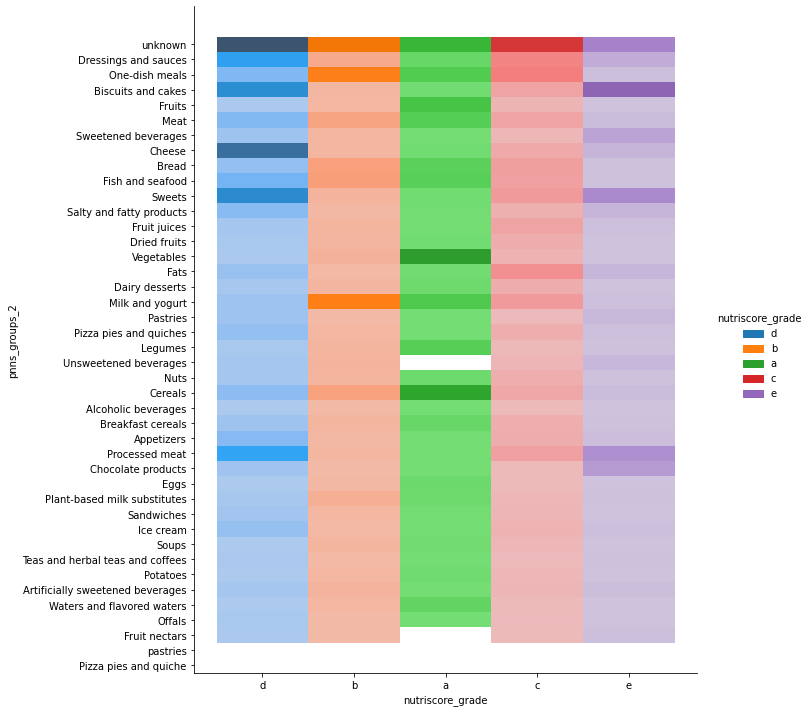

In [24]:
sns.displot(df, y='pnns_groups_2', x='nutriscore_grade', height=10, cmap='viridis', hue='nutriscore_grade')

<Figure size 1440x1440 with 0 Axes>

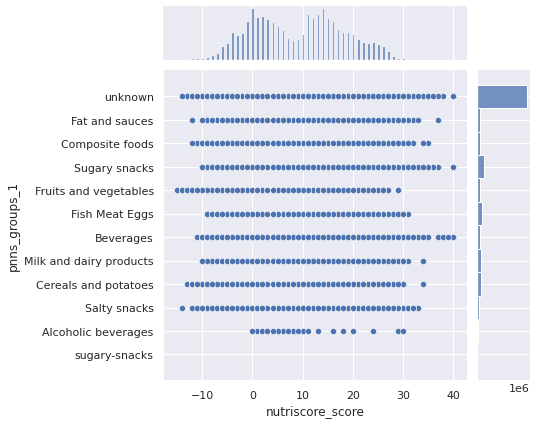

In [31]:
plt.figure(figsize=(20, 20))
sns.jointplot(data=df, x='nutriscore_score', y='pnns_groups_1')

In [33]:
pd.crosstab(df['nutriscore_grade'], df['pnns_groups_1'])

col_0,Alcoholic beverages,Beverages,Cereals and potatoes,Composite foods,Fat and sauces,Fish Meat Eggs,Fruits and vegetables,Milk and dairy products,Salty snacks,Sugary snacks,unknown
row_0,,,,,,,,,,,
a,1,4474,31520,6949,2696,12563,31084,9058,1750,1217,13582
b,1,8781,14229,13805,4166,12325,5238,14664,2427,2595,15439
c,10,9711,15029,16983,21129,17372,7256,16225,8725,12861,29402
d,21,7385,11844,12244,18647,29238,1046,39222,12269,49799,41966
e,11,15097,2211,1575,9707,16569,114,5011,5301,57869,18472


In [53]:
df.d

,Unnamed: 0,Unnamed: 0.1,code,creator,created_datetime,last_modified_datetime,product_name,brands,brands_tags,categories,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0,0,00000000000000225,nutrinet-sante,2021-06-16 14:53:28+00:00,2021-06-16 14:53:29+00:00,jeunes pousses,endives,endives,NaN,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.000,0.0
1,1,1,00000000000003429145,kiliweb,2021-09-01 08:11:51+00:00,2021-09-01 08:14:24+00:00,L.casei,NaN,NaN,NaN,...,0.0,0.0,1.4,0.90,9.8,9.8,2.7,0.10,0.040,0.0
2,2,2,0000000000017,kiliweb,2018-06-15 10:38:00+00:00,2019-06-25 11:55:18+00:00,Vitória crackers,NaN,NaN,NaN,...,375.0,1569.0,7.0,3.08,70.1,15.0,7.8,1.40,0.560,0.0
3,3,3,0000000000031,isagoofy,2018-10-13 21:06:14+00:00,2018-10-13 21:06:57+00:00,Cacao,NaN,NaN,NaN,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.000,0.0
4,4,4,000000000003327986,kiliweb,2019-11-19 15:02:16+00:00,2021-06-22 19:39:25+00:00,Filetes de pollo empanado,NaN,NaN,NaN,...,163.9,685.8,1.9,1.00,0.0,0.0,15.3,1.10,0.440,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,511,512,00000147,kiliweb,2019-11-20 17:07:26+00:00,2021-08-09 08:57:03+00:00,Pan,Kazidomi,kazidomi,"Aliments et boissons à base de végétaux, Alime...",...,240.0,1004.0,1.6,0.30,47.0,0.2,8.3,1.14,0.456,2.0
512,512,513,0000017098800,openfoodfacts-contributors,2019-01-05 17:15:42+00:00,2019-02-12 09:40:54+00:00,Cassoulet à la graisse d’oie,William saurin,william-saurin,NaN,...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.000,0.0
513,513,514,00000178,sarah-erraddahi,2020-01-21 15:37:09+00:00,2020-06-19 12:21:54+00:00,Dattes Mejdoul,Kazidomi,kazidomi,"Plant-based foods and beverages, Plant-based f...",...,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.000,0.0
514,514,515,0000018568011,kiliweb,2018-04-15 13:39:35+00:00,2019-06-25 12:01:04+00:00,Chocolat,NaN,NaN,NaN,...,557.0,2330.0,38.0,19.00,44.0,NaN,10.0,0.23,0.092,0.0


In [55]:
df.loc[df['code'] == '00000000001111111111']

,Unnamed: 0,Unnamed: 0.1,code,creator,created_datetime,last_modified_datetime,product_name,brands,brands_tags,categories,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
7,7,7,00000000001111111111,openfoodfacts-contributors,2019-06-08 18:56:13+00:00,2019-06-08 18:56:13+00:00,Sfiudwx,Watt,watt,Xsf,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
plt.figure(figsize=(12,8))
tmpdf = df[['nutriscore_score', 'fat_100g']].abs()
c, p, dof, expected = chi2_contingency(tmpdf)
sns.heatmap(tmpdf, annot=True, cmap="YlGnBu")

<AxesSubplot:>

Error in callback <function flush_figures at 0x7fd7e8b8f160> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:>

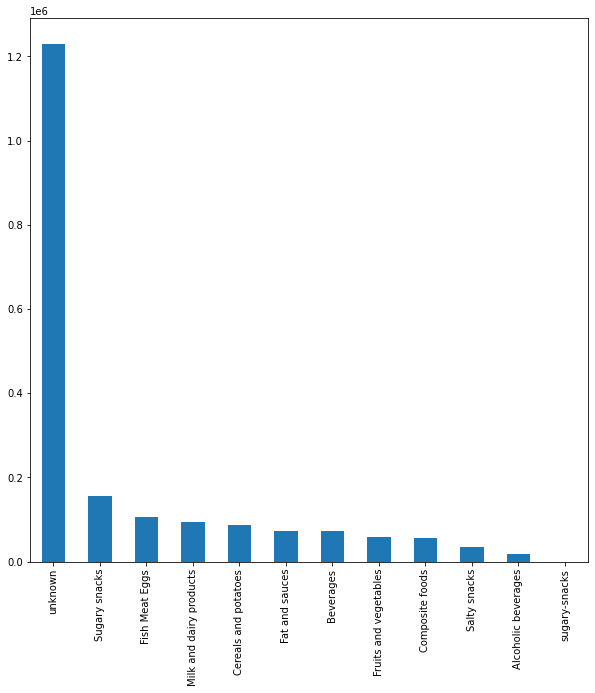

In [19]:
df['pnns_groups_1'].value_counts().plot(kind='bar', figsize=(10,10))

<AxesSubplot:>

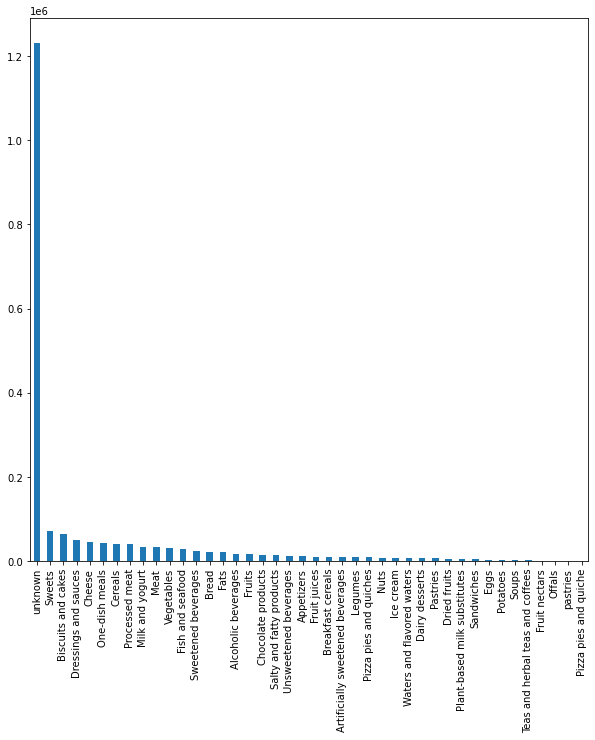

In [20]:
df['pnns_groups_2'].value_counts().plot(kind='bar', figsize=(10,10))

*********** TODO WIP *********

In [ ]:
size = qualis.size
plt.figure(figsize=(20,size*2.5))
print('distribution of values')
for i, col in enumerate(qualis):
    # sns.displot(df, x=col, bins=200)
    plt.subplot(size, 1, i+1)
    # df[col].value_counts().plot(kind='hist', bins=200, title=f'{col}')
    df.groupby(col).size().plot(kind='bar')
plt.show

## Categorization

Let's analyse `countries` category, its unique values :

In [16]:
countries_modalities = df['countries'].value_counts().index
tab = pd.DataFrame(countries_modalities, columns = ['countries'])
tab

,countries
0,France
1,United States
2,en:fr
3,en:es
4,en:it
...,...
10757,"Alemania,Rumania,España"
10758,"Suisse,France,Belgique"
10759,المانيا
10760,"Ireland,en:germany"


In [17]:
df['countries'].sample(20)

159116               Canada
810385                en:fr
1829206               Spain
659819                en:fr
160030                en:es
180263                en:ca
756929                en:fr
239163        United States
967296     France, en:spain
1845602              España
747370               France
1879454              España
913510               France
424627        United States
1666686               en:it
247801        United States
951942               France
32747                 en:it
1128254               en:fr
1916976              France
Name: countries, dtype: object

`countries` feature contains lots of different values, despite we can transform and categorize them, using standardized country code 'XX'

In [20]:
# add new column to dataset with standardized country code
df['countries_cleaned'] = df['countries'].fillna("XX").apply(cleanCategory)
print(f"our dataset results with {df['countries_cleaned'].unique().size} different country codes")

our dataset results with 421 different country codes


In [21]:
# Some values represent several countries and seperate them with ','
# This algorithm cannot process them, what is the impact ?
df[['countries', 'countries_cleaned']][df['countries'].fillna('').str.contains(',')].sample(25)

,countries,countries_cleaned
1202794,"Ireland, Germany",IR
1349027,"France,Irlande",FR
1586144,"Francia,Italia",FR
1898500,"France, en:nl",NL
1858141,"Espanya,en:spain",ES
1912794,"Autriche, France",AU
1719473,"France,Germany",FR
1627805,"France,Roumanie",FR
1096322,"France,en:france",FR
1184457,"Frankreich, Deutschland",FR


In [23]:
print(f"{df[['countries']][df['countries'].fillna('').str.contains(',')].count().values} out of {df.shape[0]} rows have a country label possibly not standardized correctly")

[103573] out of 1986910 rows have a country label possibly not standardized correctly


~100K lines contains countries code we are not able to process correclty, which represents about 5% of the dataset, which is insignificant.

Note : theses lines are not well explained, so we are not able to understand correctly what it means when several countries seperated by a comma appears in this columns

Now, let's transform `countries_cleaned` feature with numerical data so we can make statistics on it

In [24]:
df['countries_cleaned_cat'] = df['countries_cleaned'].astype('category')

In [25]:
# Example of application
pd.crosstab(df['countries_cleaned'], df['nutriscore_grade'])

col_0,a,b,c,d,e
row_0,,,,,
::,0,1,0,0,0
AD,10,20,18,24,8
AE,16,19,13,16,17
AF,16,22,35,41,24
AH,0,0,1,1,1
...,...,...,...,...,...
美国,0,0,1,0,0
西班,0,0,0,1,0
香港,0,4,1,4,0


In [27]:
df['countries_cleaned_cat'].cat.codes.unique().max()
# df[df['countries_cleaned'] == 'FR']

420

What are the most represented countries ?

In [28]:
df['countries_cleaned_cat'].mode()

0    FR
Name: countries_cleaned_cat, dtype: object

In [29]:
most_countries = df.value_counts(subset='countries_cleaned_cat').head(3).index
df.loc[~df['countries_cleaned_cat'].isin(most_countries)].shape

(572096, 41)

<AxesSubplot:title={'center':'distribution of countries in dataset (top 20)'}>

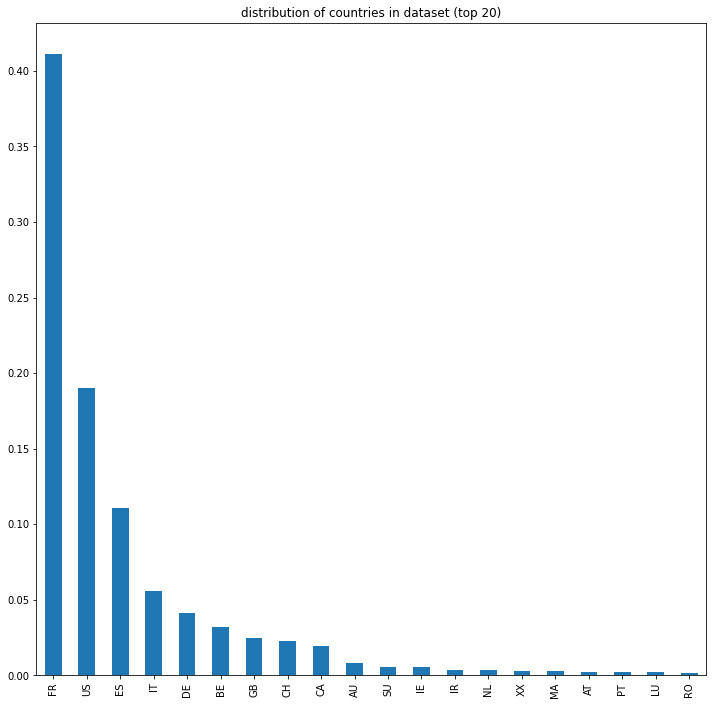

In [31]:
df['countries_cleaned_cat'].value_counts(normalize=True).head(20).plot(kind='bar', figsize=(12,12), title='distribution of countries in dataset (top 20)')

The diagram above shows our dataset is composed of product coming in majority from France, US, Spain and Italy. The other countries represents less than 5% each.

In [32]:
print(df[df.countries_cleaned_cat == 'FR'][df.nutriscore_score != 0].shape)
subset = df[df.countries_cleaned_cat == 'FR'][df.nutriscore_score != 0].dropna(subset=['nutriscore_score'])
subset.sample(20).T
print(subset.shape)
# subset["nutriscore_score"].hist()

(802779, 41)
(277305, 41)


--------------------
FR
(277305, 43)
moy:
 9.924505508375255
med:
 11.0
mod:
 0    14.0
Name: nutriscore_score, dtype: float64
var:
 75.56730142917665
ect:
 8.69294549788371


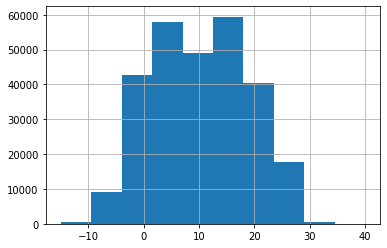

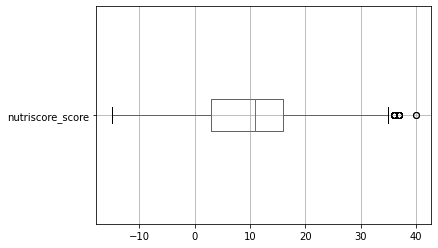

--------------------
US
(226101, 43)
moy:
 9.495844777334023
med:
 11.0
mod:
 0    14.0
Name: nutriscore_score, dtype: float64
var:
 82.31288382699903
ect:
 9.072644808819478


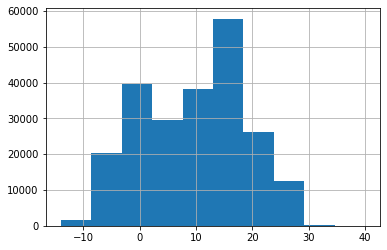

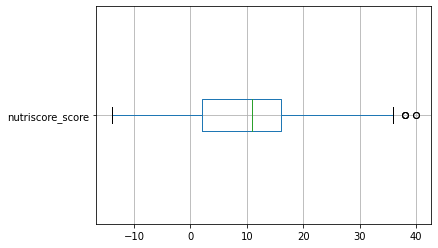

--------------------
ES
(52616, 43)
moy:
 9.174984795499467
med:
 9.0
mod:
 0    6.0
Name: nutriscore_score, dtype: float64
var:
 70.34605281640255
ect:
 8.387255380421092


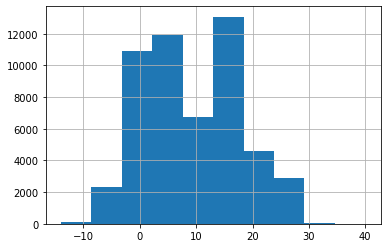

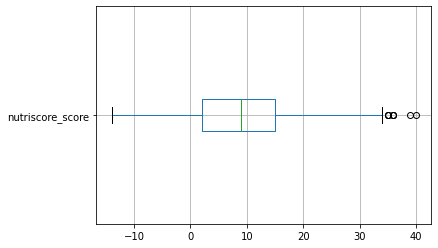

--------------------
IT
(16990, 43)
moy:
 9.380929958799294
med:
 11.0
mod:
 0    13.0
Name: nutriscore_score, dtype: float64
var:
 71.59050154836086
ect:
 8.461117039041646


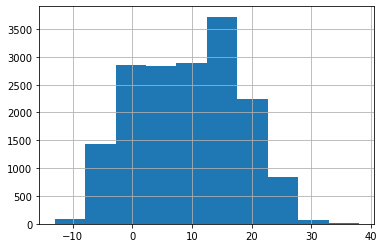

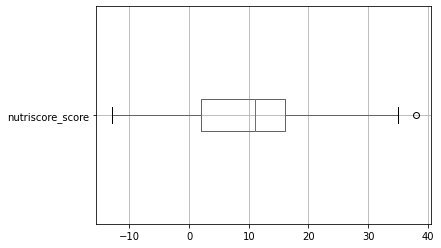

In [66]:
for cat in ['FR', 'US', 'ES', 'IT']:
    subset = df[df.countries_cleaned_cat == cat][df.nutriscore_score != 0].dropna(subset=['nutriscore_score'])
    print("-"*20)
    print(cat)
    print(subset.shape)
    print("moy:\n",subset['nutriscore_score'].mean())
    print("med:\n",subset['nutriscore_score'].median())
    print("mod:\n",subset['nutriscore_score'].mode())
    print("var:\n",subset['nutriscore_score'].var(ddof=0))
    print("ect:\n",subset['nutriscore_score'].std(ddof=0))
    subset["nutriscore_score"].hist()
    plt.show()
    subset.boxplot(column="nutriscore_score", vert=False)
    plt.show()

TODO : mesurer le taux de score grade entre FR et US --> est-ce qu'on mange mieux en France ?

Replace `nutriscore_grade` by a numerical feature, and analyse it

In [35]:
df['nutriscore_grade_cat'] = df['nutriscore_grade'].astype('category')

In [36]:
df['nutriscore_grade_cat'].dropna().cat.categories

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [37]:
df['nutriscore_grade_cat_codes'] = df['nutriscore_grade_cat'].dropna().cat.codes

In [38]:
df['nutriscore_grade_cat'].dropna().cat.codes.unique()

array([3, 1, 0, 2, 4], dtype=int8)

Pearson Correlation coefficient

In [ ]:
# TODO : dessiner le graphe de correlation, en reduisant les valeurs car sinon trop grand fail
# plt.plot(df.nutriscore_grade_cat_codes, df.nutriscore_score)

In [39]:
df[['nutriscore_grade_cat_codes', 'nutriscore_score']].corr()

,nutriscore_grade_cat_codes,nutriscore_score
nutriscore_grade_cat_codes,1.000000,0.944611
nutriscore_score,0.944611,1.000000


another way to see that these two features are higly correlated

## (Bar) Code Analysis

We know `code`is a quantitative value, but it's not continuous since it represents the barcode: it's a number to consider as a string.

In this analysis, we want to remove code beginning with 200, which are default value, and focus on real barcodes

In [135]:
pd.options.display.float_format = '{:,.2f}'.format
panier = df[(df['countries_cleaned_cat'] == 'FR') & (~df['nutriscore_grade_cat'].isna())].sample(20)
panier.sum()

Unnamed: 0                                21,036,266.00
Unnamed: 0.1                              21,056,281.00
additives_n                                       21.00
ingredients_from_palm_oil_n                        1.00
ingredients_that_may_be_from_palm_oil_n            1.00
nutriscore_score                                 235.00
nova_group                                        40.00
energy-kcal_100g                               6,378.32
energy_100g                                   28,369.00
fat_100g                                         289.50
saturated-fat_100g                               156.65
carbohydrates_100g                               544.30
sugars_100g                                       60.70
proteins_100g                                    153.78
salt_100g                                         28.30
sodium_100g                                       11.32
nutrition-score-fr_100g                          235.00
nutriscore_grade_cat_codes                      


## Analysis

In [41]:
pd.crosstab(df['countries_cleaned_cat'], df['nutriscore_grade'])

col_0,a,b,c,d,e
row_0,,,,,
::,0,1,0,0,0
AD,10,20,18,24,8
AE,16,19,13,16,17
AF,16,22,35,41,24
AH,0,0,1,1,1
...,...,...,...,...,...
美国,0,0,1,0,0
西班,0,0,0,1,0
香港,0,4,1,4,0


<AxesSubplot:xlabel='countries_cleaned_cat', ylabel='Count'>

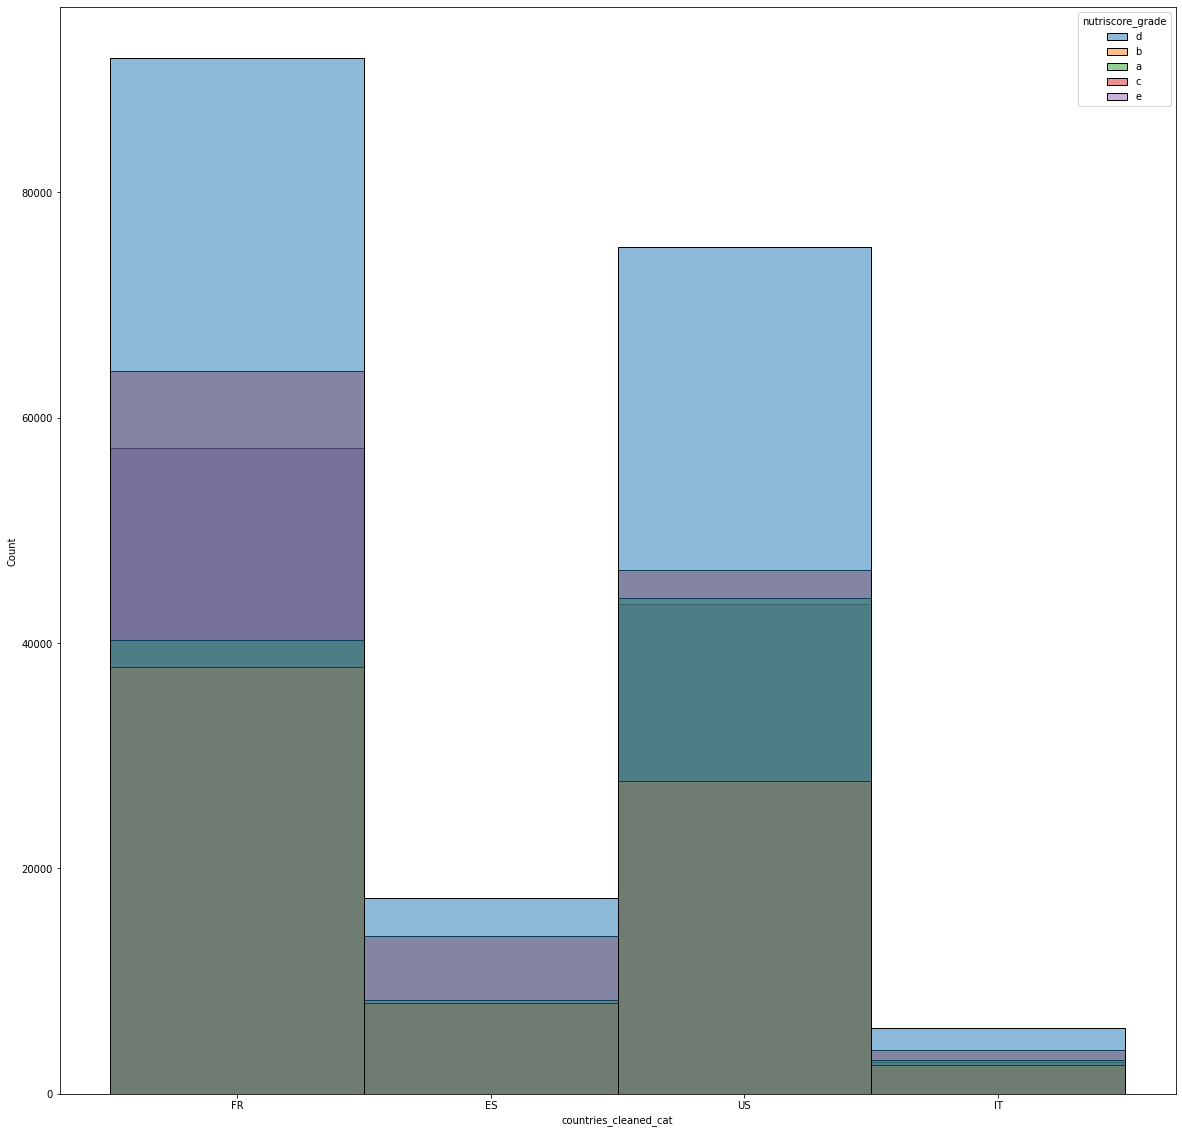

In [59]:
plt.figure(figsize=(20,20))
tmpdf = df.countries_cleaned_cat.isin(['FR', 'US', 'ES', 'IT'])
sns.histplot(df[tmpdf], x='countries_cleaned_cat', hue='nutriscore_grade')